# Homework 2: Food Safety 
## Cleaning and Exploring Data with Pandas

<img src="scoreCard.jpg" width=400>

In this homework, you will investigate restaurant food safety scores for restaurants in San Francisco. Above is a sample score card for a restaurant. The scores and violation information have been made available by the San Francisco Department of Public Health, and we have made these data available to you via the DS 100 repository. The main goal for this assignment is to understand how restaurants are scored. We will walk through the various steps of exploratory data analysis to do this. To give you a sense of how we think about each discovery we make and what next steps it leads to we will provide comments and insights along the way.

As we clean and explore these data, you will gain practice with:
* Reading simple csv files
* Working with data at different levels of granularity
* Identifying the type of data collected, missing values, anomalies, etc.
* Exploring characteristics and distributions of individual variables

### Question 0

To start the assignment, run the cell below to set up some imports and the automatic tests that we will need for this assignment:

In [1]:
import os
from IPython.display import display, Latex, Markdown
from client.api.notebook import Notebook
ok = Notebook('hw2.ok')

Assignment: Homework 2
OK, version v1.12.10



In many of these assignments (and your future adventures as a data scientist) you will use pandas, numpy, matplotlib.pyplot, and seaborn.  

1. Import each of these libraries `as` their commonly used abbreviations (e.g., `pd`, `np`, `plt`, and `sns`).  
1. Don't forget to use the jupyter notebook "magic" to enable [inline matploblib plots](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib). 
1. Add the line `sns.set()` to make your plots look nicer.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()

Now, run this cell to log into OkPy:

In [4]:
# Sometimes you'll run into an OAuth bug when you run ok.auth(). If so,
# uncomment this line of code and run this cell again.
os.remove(os.path.join(os.path.expanduser('~'), '.config', 'ok', 'auth_refresh'))

ok.auth()


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: ZfUU5KB5HlJXfTCc46HzX6fmwGMLbD
Successfully logged in as mattholtzer9@berkeley.edu


## Loading Food Safety Data

To begin our investigation, we need to understand the structure of the data. Recall this involves answering questions such as 

* Is the data in a standard format or encoding?
* Is the data organized in records?
* What are the fields in each record?

There are 4 files in the data directory.  Use the `ls -lh` command to list all the files and their sizes stored in the data directory.

**Note for Windows users:** Unfortunately, since Windows is not a UNIX system most lines of shell code won't work. You can reference http://simplyadvanced.net/blog/cheat-sheet-for-windows-command-prompt/ for how to translate the code into the Windows command prompt, or you can use http://datahub.berkeley.edu/, or if you're feeling adventurous you can try to [set up Anaconda in Bash environment that Windows has recently started to support](http://www.cgranade.com/blog/2016/08/22/qutip-on-wsl.html).

In [5]:
ls -lh data

total 9904
-rwxr-xr-x@ 1 matt  staff   645K Sep 11 22:06 businesses.csv*
-rwxr-xr-x@ 1 matt  staff   493K Sep 11 22:06 inspections.csv*
-rwxr-xr-x@ 1 matt  staff   120B Sep 11 22:06 legend.csv*
-rwxr-xr-x@ 1 matt  staff   3.7M Sep 11 22:06 violations.csv*


### Question 1a

From the above output we see that one of the files is relatively small.  Use the `cat` command to cat that file and print what it contains.  

In [6]:
!cat data/legend.csv

### Question 1b

Run the `head` command to verify that the remaining files are also CSV formatted as their file extension suggests

In [7]:
!head data/*

==> data/businesses.csv <==











==> data/inspections.csv <==











==> data/legend.csv <==






==> data/violations.csv <==












Answer the following boolean expressions using (True or False).

In [8]:
# Are all the files CSV files?
all_files_appear_to_be_csv = True

# Do all the files have a header line?
all_files_contain_headers = True

# Do all the strings in the file have quotes around them?
strings_appear_quoted = True

### Question 1c

Run the following command to determine the file encoding of each of these files

In [9]:
!file data/*

data/businesses.csv:  ISO-8859 text, with CRLF line terminators
data/inspections.csv: ASCII text, with CRLF line terminators
data/legend.csv:      ASCII text, with CRLF line terminators
data/violations.csv:  ASCII text, with CRLF line terminators


In [10]:
pd.read_csv?

Based on the above information let's attempt to load the `businesses.csv`, `inspections.csv`, and the `violations.csv` into pandas data frames with the following names `bus`, `ins`, and `vio`.  Because of character encoding issues one of the files will require an additional argument `encoding='ISO-8859-1'` when calling `pd.read_csv`. 

In [11]:
# path to directory containing data
dsDir = "data/"

bus = pd.read_csv("data/businesses.csv", encoding='ISO-8859-1')
ins = pd.read_csv("data/inspections.csv")
vio = pd.read_csv("data/violations.csv")

Run the following cells in order to view a portion of each dataframe.

In [12]:
bus.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,+14154217044
1,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
2,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
3,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051


In [13]:
ins.head(5)

,business_id,score,date,type
0,10,82,20160503,routine
1,10,94,20140729,routine
2,10,92,20140114,routine
3,19,94,20160513,routine
4,19,94,20141110,routine


In [14]:
vio.head(5)

,business_id,date,description
0,10,20160503,High risk food holding temperature [ date vi...
1,10,20160503,High risk food holding temperature [ date vi...
2,10,20160503,High risk vermin infestation
3,10,20160503,Unapproved or unmaintained equipment or utensils
4,10,20160503,No thermometers or uncalibrated thermometers


### Question 1d

In the following describe at least one potential problem with the above data. Consider issues with missing values and bad data.  

In [15]:
q1d_answer = r"""

One issue that I can potentially see is the way the date is stored, as one eight digit number instead of being
stored in a more easily manipulatable format. This isn't a huge problem but if left as is could prove to be a 
problem for certain types of data manipulation, such as checking if day of month/month/year play a role in affecting
ratings, which would definitely be something on my radar to check.

"""

display(Markdown(q1d_answer))



One issue that I can potentially see is the way the date is stored, as one eight digit number instead of being
stored in a more easily manipulatable format. This isn't a huge problem but if left as is could prove to be a 
problem for certain types of data manipulation, such as checking if day of month/month/year play a role in affecting
ratings, which would definitely be something on my radar to check.



In [16]:
_ = ok.grade('q01')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: mattholtzer9@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/DkV3gy
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



We will explore each file in turn, including determining its granularity and primary keys and exploring many of the variables indivdually. Let's begin with the businesses file, which has been read into the data.frame `bus`.

## Examining the Business data

From its name alone, we expect the `businesses.csv` file to contain information about the restaurants. Let's investigate the granularity of this dataset.

**Important note: From now on, the local autograder tests will not be comprehensive. You can pass the OkPy tests in your notebook but still fail tests in the autograder.** Please be sure to check your results carefully.

### Question 2

#### Question 2a

Examining the entries in in the `businesses.csv` table `bus` is the `business_id` unique for each record?

In [17]:
bus['business_id'].value_counts() # use value_counts() or unique() to determine if the business_id field is unique

2047     1
71088    1
1458     1
62900    1
1466     1
69051    1
81341    1
7617     1
83394    1
81349    1
1482     1
85451    1
30156    1
81357    1
87927    1
1490     1
85459    1
81365    1
2843     1
87512    1
24025    1
83418    1
3547     1
5974     1
5544     1
81269    1
11687    1
5504     1
3459     1
81285    1
        ..
85400    1
80658    1
2836     1
86807    1
78619    1
2788     1
62179    1
87780    1
78531    1
80554    1
76464    1
66229    1
39606    1
4791     1
82719    1
84668    1
86994    1
83148    1
2756     1
82653    1
709      1
35469    1
37575    1
64202    1
78539    1
2764     1
84692    1
78555    1
2780     1
71683    1
Name: business_id, Length: 6315, dtype: int64

In [18]:
is_business_id_unique = True # put your final answer True/False here

In [19]:
_ = ok.grade('q02a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: mattholtzer9@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/G6V3lL
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 2b

With this information, you can address the question of granularity and so answer the questions below.

1. What is the granularity of the businesses data frame? 
1. How many records are there?
1. What does each record represent (e.g., a store, a chain, a transaction)?  
1. What is the primary key?

Please write your answer in the `q2b_answer` variable. You may create new cells to run code as long as you don't delete the cell below.

In [20]:
# use this cell for scratch work
# consider using groupby or value_counts() on the 'name' or 'business_id' 
len(bus["business_id"])

6315

In [21]:
bus['name'].value_counts()

STARBUCKS COFFEE                            72
PEET'S COFFEE & TEA                         24
MCDONALDS                                   12
SAN FRANCISCO SOUP COMPANY                  11
WALGREENS                                   11
LEE'S DELI                                  10
SPECIALTY'S CAFE & BAKERY                    9
AT&T PARK - FOOD CART                        9
JAMBA JUICE                                  9
SUBWAY SANDWICHES                            8
PHILZ COFFEE                                 7
WHOLE FOODS MARKET                           7
BON APPETIT MANAGEMENT CO                    7
BON APPETIT @ TWITTER                        7
MIXT GREENS                                  6
SUBWAY                                       6
PROPER FOOD                                  6
NUCHA                                        6
AT&T PARK - DRAFT BEER CART                  6
BLUE BOTTLE COFFEE                           6
JW MARRIOTT SF UNION SQUARE                  5
LA BOULANGERI

In [22]:
q2b_answer = r"""

1. The granularity is a business in San Francisco
2. There are 6315 records
3. Each record represents a store
4. The primary key is the business id

"""

display(Markdown(q2b_answer))



1. The granularity is a business in San Francisco
2. There are 6315 records
3. Each record represents a store
4. The primary key is the business id



## Zip code

Next, let's  explore some of the variables in the business table. We begin by examining the postal code.

### Question 3

#### Question 3a


What kind of values are in the variable postal code in the `bus` data frame?  
1. Is zip code quantitative or qualitative? If qualitative, is it ordinal or nominal? 
1. How are the zip code values encoded in python: ints, floats, strings, booleans ...

To answer the second question you might want to examine a particular entry.

In [23]:
bus["postal_code"].value_counts()

94110        585
94103        558
94102        458
94107        451
94133        417
94109        383
94111        282
94122        270
94118        243
94115        238
94114        230
94105        226
94108        224
94117        197
94112        190
94123        169
94124        164
94121        161
94132        134
94104        133
94116         93
94134         74
94127         71
94131         48
94158         17
94130          8
94143          5
CA             3
Ca             3
94129          2
94013          2
94101          2
94014          2
94120          1
00000          1
941            1
92672          1
94602          1
94609          1
94188          1
941033148      1
941102019      1
94066          1
94621          1
94545          1
95105          1
Name: postal_code, dtype: int64

In [24]:
# Use this cell for your explorations.
q3a_answer = r"""

1. Zip code is qualitative and is nominal.
2. These values are stored as an int.

"""

display(Markdown(q3a_answer))



1. Zip code is qualitative and is nominal.
2. These values are stored as an int.



#### Question 3b

To explore the zip code values, it makes sense to examine counts, i.e., the number of records  that have the same zip code value. This is essentially answering the question: How many restaurants are in each zip code? 

Please generate a dataframe with `postal_code` as the index and a column called `count` which denotes the number of restaurants for each zip code.   If the zipcode is missing be sure to replace it with `MISSING` (e.g., by using `fillna`).

In [25]:
pd.value_counts?

In [28]:
pd.DataFrame.fillna?

In [26]:
bus['postal_code'] = bus['postal_code'].fillna('MISSING')
bus['postal_code']

0         94104
1         94109
2         94104
3         94133
4         94110
5         94122
6         94103
7         94115
8         94131
9         94111
10        94133
11        94122
12        94110
13        94115
14        94104
15        94104
16        94117
17        94117
18        94107
19        94110
20        94133
21        94108
22        94108
23        94102
24        94108
25        94111
26        94108
27        94133
28        94133
29        94111
         ...   
6285    MISSING
6286      94111
6287      94104
6288      94122
6289      94122
6290      94122
6291      94158
6292      94105
6293      94110
6294      94110
6295      94110
6296      94102
6297      94103
6298      94103
6299      94103
6300      94103
6301      94122
6302      94123
6303      94116
6304      94133
6305      94111
6306      94122
6307      94110
6308      94111
6309      94109
6310      94103
6311      94127
6312      94116
6313      94112
6314      94110
Name: postal_code, Lengt

In [27]:

zip_counts = pd.DataFrame(
    data = {'count': bus["postal_code"].value_counts()},
    index = bus['postal_code'].value_counts().index
)
zip_counts

,count
94110,585
94103,558
94102,458
94107,451
94133,417
94109,383
94111,282
94122,270
MISSING,259
94118,243


In [28]:
_ = ok.grade('q03b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: mattholtzer9@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/Nk63qD
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



We see that there are many missing values for zip code. There is also some bad data where the postal code got screwed up, e.g., there are 3 'Ca' and 3 'CA' values. Additionally, there are some extended postal codes that are 9 digits long, rather than the typical 5 digits.

Let's clean up the extended zip codes by dropping the digits beyond the first 5. It's typically good practice to keep the original values when we are manipulating data and place the modified data in a new column in the DataFrame. We'll call the new column `zip_code`.

In [78]:
bus['postal_code']

0         94104
1         94109
2         94104
3         94133
4         94110
5         94122
6         94103
7         94115
8         94131
9         94111
10        94133
11        94122
12        94110
13        94115
14        94104
15        94104
16        94117
17        94117
18        94107
19        94110
20        94133
21        94108
22        94108
23        94102
24        94108
25        94111
26        94108
27        94133
28        94133
29        94111
         ...   
6285    MISSING
6286      94111
6287      94104
6288      94122
6289      94122
6290      94122
6291      94158
6292      94105
6293      94110
6294      94110
6295      94110
6296      94102
6297      94103
6298      94103
6299      94103
6300      94103
6301      94122
6302      94123
6303      94116
6304      94133
6305      94111
6306      94122
6307      94110
6308      94111
6309      94109
6310      94103
6311      94127
6312      94116
6313      94112
6314      94110
Name: postal_code, Lengt

In [29]:
# Run me
bus['zip_code'] = bus['postal_code'].str[:5]
bus['zip_code'].value_counts(dropna=False)

94110    586
94103    559
94102    458
94107    451
94133    417
94109    383
94111    282
94122    270
MISSI    259
94118    243
94115    238
94114    230
94105    226
94108    224
94117    197
94112    190
94123    169
94124    164
94121    161
94132    134
94104    133
94116     93
94134     74
94127     71
94131     48
94158     17
94130      8
94143      5
CA         3
Ca         3
94129      2
94013      2
94101      2
94014      2
94188      1
00000      1
94066      1
941        1
94602      1
94545      1
92672      1
94120      1
94609      1
94621      1
95105      1
Name: zip_code, dtype: int64

#### Question 3c

We notice that there are still a lot of missing values!  Examine the businesses with missing zipcode values.  Pay attention to their addresses.  Are there any patterns to missing values in zip codes?

**Hint:** You can use `.iloc` to look at different sections of the DataFrame.

In [30]:
bus.loc[bus['zip_code']=='MISSI']['address'].value_counts()

 OFF THE GRID                               73
 APPROVED PRIVATE LOCATIONS                  8
 APPROVED LOCATIONS                          4
428 11TH ST                                  3
 HUNTERS POINT BUILDING 110 SHIPYARD         2
OFF THE GRID                                 2
VARIOUS LOCATIONS                            2
 GOLDEN GATE PARK                            2
 JUSTIN HERMAN PLAZA                         2
839 CLAY                                     1
170 O'FARRELL ST                             1
2826 JONES ST                                1
5158 GEARY BLVD                              1
681 BROADWAY ST                              1
1355 MARKET ST                               1
3251 20TH AVE                                1
1099 MISSION ST                              1
3331 24TH ST                                 1
6314 GEARY BLVD                              1
50 BEALE ST 105                              1
 PRIVATE PROPERTY                            1
900 NORTH POI

In [31]:
# Use this cell for your explorations.
q3c_answer = r"""

There are 73 locations that are "OFF THE GRID" and several others that appear to be more temporary type locations.
It is possible that these missing locations are more likely to be service based/food trucks than the general pop.

"""

display(Markdown(q3c_answer))



There are 73 locations that are "OFF THE GRID" and several others that appear to be more temporary type locations.
It is possible that these missing locations are more likely to be service based/food trucks than the general pop.



#### Question 3d

Often times, we need to get additional information in order to understand whether or not the data are bad values or simply unusual values. With zip codes, we can use the Internet to investigate the zip codes that have only a few businesses. Investigate the restaurants at the following zip codes: *94545*, *94602*, and *94609*.  

Briefly describe why these strange zip codes might be appropriate.  Where are they located and how might they relate to San Francisco?


In [32]:
bus.set_index('zip_code').loc[["94545", "94602", "94609"]]

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
zip_code,,,,,,,,,
94545,5755,J & J VENDING,VARIOUS LOACATIONS (17),San Francisco,CA,94545,NaN,NaN,+14156750910
94602,85459,ORBIT ROOM,1900 MARKET ST,San Francisco,CA,94602,NaN,NaN,+14153705584
94609,65673,DOC'S OF THE BAY,PUBLIC RIGHT OF WAY,San Francisco,CA,94609,37.834628,-122.264171,+14156883245


In [33]:
# Use this cell for your explorations.
q3d_answer = r"""

94545 - Hayward. J&J Vending is listed as having Various Locations. That is because it appears to be more of
a service than a physical location, contracting out their services to multiple office spaces in SF. It's
headquarters are in Hayward, which is the zip code listed.

94602 - Southeast Oakland. I can't quite figure out exactly why this has an Oakland address, but I found an article
from 2015 showing that Orbit Room had closed. I was also able to find another similarly owned establishment in Oakland
that had closed several years prior. Regardless the 94602 number appears to be a mistake, likely having to do with
some sort of mixup or confusion with an ownership change.

94609 - Northeast Oakland. When I look up Doc's of the Bay online the location that comes up is in Oakland. It appears
that Doc's is a food truck and has also been closed for over a year.

"""

display(Markdown(q3d_answer))



94545 - Hayward. J&J Vending is listed as having Various Locations. That is because it appears to be more of
a service than a physical location, contracting out their services to multiple office spaces in SF. It's
headquarters are in Hayward, which is the zip code listed.

94602 - Southeast Oakland. I can't quite figure out exactly why this has an Oakland address, but I found an article
from 2015 showing that Orbit Room had closed. I was also able to find another similarly owned establishment in Oakland
that had closed several years prior. Regardless the 94602 number appears to be a mistake, likely having to do with
some sort of mixup or confusion with an ownership change.

94609 - Northeast Oakland. When I look up Doc's of the Bay online the location that comes up is in Oakland. It appears
that Doc's is a food truck and has also been closed for over a year.



#### Question 3e

Often want to clean the data to improve our analysis. This cleaning might include changing values for a variable or dropping records.

Let's correct 94602 to the more likely value based on your analysis.  Let's modify the derived field `zip_code` using `bus['zip_code'].str.replace` to replace 94602 with the correct value.

In [34]:
bus['zip_code'] = bus['zip_code'].str.replace('94602','94102')

In [35]:
_ = ok.grade('q03e')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: mattholtzer9@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/OY03rY
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Latitude and Longitude

Another aspect of the data we want to consider is the prevalence of missing values. If many records have missing values then we might be concerned about whether the nonmissing values are represenative of the population.

### Question 4
 
Consider the longitude and latitude in the business DataFrame. 

#### Question 4a

How many businesses are missing longitude and latitude values?

In [36]:
bus[['latitude', 'longitude']]

,latitude,longitude
0,37.791116,-122.403816
1,37.786848,-122.421547
2,37.792888,-122.403135
3,37.807155,-122.419004
4,37.747114,-122.413641
5,37.764013,-122.465749
6,37.771437,-122.423892
7,37.784626,-122.437734
8,37.742325,-122.426476
9,37.794483,-122.396584


In [37]:
missing_latlongs = len(bus)-len(bus[['latitude', 'longitude']].dropna())
missing_latlongs

2716

In [38]:
_ = ok.grade('q04a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: mattholtzer9@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/PNV3v1
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



Do some zip codes have more than their fair share of missing lat/lon values?

Let's reduce our comparison to just those zips that are in SF and that have many businesses. Below is a list of zip codes.

In [39]:
validZip = ["94102", "94103", "94104", "94105", "94107", "94108",
            "94109", "94110", "94111", "94112", "94114", "94115",
            "94116", "94117", "94118", "94121", "94122", "94123", 
            "94124", "94127", "94131", "94132", "94133", "94134"]

#### Question 4b

For these zip codes find the number of businesses in each zip code and the number without longitude values. Do any zip codes appear to have more than their 'fair share' of missing longitude? To answer this, you will want to compare the proportion of missing values for each zip code.

Create a new dataframe of counts of the null and proportion of null values, storing the result in `bus_sf_latlong`. It should have 3 columns:

1. `zip_code`: Contains the zip codes in the `validZip` variable above.
2. `null_lon`: The number of missing values for the zip code.
3. `not_null_lon`: The proportion of present values for the zip code.

In [173]:
bus_sf = bus.loc[bus['zip_code'].isin(validZip)]
bus_sf.groupby(['zip_code', 'longitude']).sum().head()

business_id   latitude
zip_code longitude                          
94102    -122.429927         2538  37.772163
         -122.428627         4893  37.772323
         -122.427744         7653  37.776298
         -122.426446         5175  37.776504
         -122.426292        17612  37.776955

In [202]:
bus_sf['longitude'] = bus_sf['longitude'].fillna('MISSING')
miss = bus_sf.loc[bus_sf['longitude']=='MISSING']
miss.groupby(['zip_code', 'longitude'], as_index = False).size()


/Users/matt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


zip_code  longitude
94102     MISSING      197
94103     MISSING      253
94104     MISSING       59
94105     MISSING      100
94107     MISSING      247
94108     MISSING       82
94109     MISSING      146
94110     MISSING      251
94111     MISSING      115
94112     MISSING       59
94114     MISSING      108
94115     MISSING       76
94116     MISSING       35
94117     MISSING       67
94118     MISSING      100
94121     MISSING       55
94122     MISSING      123
94123     MISSING       53
94124     MISSING       88
94127     MISSING       28
94131     MISSING       14
94132     MISSING       65
94133     MISSING      135
94134     MISSING       29
dtype: int64

In [187]:
bus_sf.groupby('zip_code').size()

zip_code
94102    459
94103    559
94104    133
94105    226
94107    451
94108    224
94109    383
94110    586
94111    282
94112    190
94114    230
94115    238
94116     93
94117    197
94118    243
94121    161
94122    270
94123    169
94124    164
94127     71
94131     48
94132    134
94133    417
94134     74
dtype: int64

zip_code  longitude
94102     MISSING      0.570806
94103     MISSING      0.547406
94104     MISSING      0.556391
94105     MISSING      0.557522
94107     MISSING      0.452328
94108     MISSING      0.633929
94109     MISSING      0.618799
94110     MISSING      0.571672
94111     MISSING      0.592199
94112     MISSING      0.689474
94114     MISSING      0.530435
94115     MISSING      0.680672
94116     MISSING      0.623656
94117     MISSING      0.659898
94118     MISSING      0.588477
94121     MISSING      0.658385
94122     MISSING      0.544444
94123     MISSING      0.686391
94124     MISSING      0.463415
94127     MISSING      0.605634
94131     MISSING      0.708333
94132     MISSING      0.514925
94133     MISSING      0.676259
94134     MISSING      0.608108
dtype: float64

In [220]:

# You might want to filter the bus dataframe to contain only the validZip
bus_sf = bus.loc[bus['zip_code'].isin(validZip)]

# Create a new dataframe of counts of the null and proportion of null values
bus_sf_latlong = pd.DataFrame(
    data = {"zip_code": validZip,
            "null_lon": miss.groupby(['zip_code', 'longitude'], as_index = False).size(),
            "not_null_lon": (1-(miss.groupby(['zip_code', 'longitude']).size()/bus_sf.groupby('zip_code').size()))}
)


In [224]:
_ = ok.grade('q04b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Submit... 100% complete
Submission successful for user: mattholtzer9@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/submissions/ERVzYl
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Summary of the business data

Before we move on to explore the other data, let's take stock of what we have learned and the implications of our findings on future analysis. 

* We found that the business id is unique across records and so we may be able to use it as a key in joining tables. 
* We also found that there are some bad values in zip code. As a result, we may want to drop the records with zip codes outside of San Francisco or to treat them differently. For some of the bad values, we may want to take the time to look up the restaurant address online and fix these errors.   
* We also found that there are many missing values in latitude and longitude. These may have implications on map making and geographic patterns if the missingness is related to location or restaurant score.

# Investigate the inspection data

Let's now turn to the inspection DataFrame. Earlier, we found that `ins` has 4 columns, these are named `business_id`, `score`, `date` and `type`.  In this section, we determine the granularity of `ins` and investigate the kinds of information provided for the inspections. 

### Question 5

#### Question 5a
As with the business data, assess whether there is one inspection record for each business. 

In [47]:
# The number of rows in ins
rows_in_table = len(ins)

# The number of unique IDs in ins.
unique_ins_ids = len(ins["business_id"].value_counts())

# What does this tell you?

In [48]:
_ = ok.grade('q05a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: mattholtzer9@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/mZ9vJ9
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 5b

Next, we examine the `type` variable. From examining the first few rows of `ins`, we see that `type` is a string and one of the values in the string is 'routine', presumably for a routine inspection. What values does `type` take on? How many occurrences of each value is in the DataFrame? What are the implications for further analysis?

In [49]:
# use this cell for scratch work
# 

ins['type'].value_counts()

routine      15429
complaint        1
Name: type, dtype: int64

In [50]:
q5b_answer = r"""

There are two different values in type, routine and complaint. There are 15,429 instances of routine and 1 of complaint.
For our analysis this likely means that there won't be very much we are going to learn about routine vs complaint or
complaint inspections at all since there isn't enough for extrapolation. 

"""

display(Markdown(q5b_answer))



There are two different values in type, routine and complaint. There are 15,429 instances of routine and 1 of complaint.
For our analysis this likely means that there won't be very much we are going to learn about routine vs complaint or
complaint inspections at all since there isn't enough for extrapolation. 



#### Question 5c

Since the data was stored in a .csv file, the dates are formatted as strings such as `20160503`. Once we read in the data, we would like to have dates in an appropriate format for analsysis. Add a new column called `new_date` which formats the `date` into a datetime object. Then add a column called `year` with only the year.

*Hint: You'll want to use the `pd.datetime` functionality at some point.*

In [51]:
pd.datetime?

In [54]:
ins['date'].str?

In [86]:
pd.to_datetime?

In [87]:
ins['date']

0        20160503
1        20140729
2        20140114
3        20160513
4        20141110
5        20140214
6        20161005
7        20160311
8        20141124
9        20140612
10       20160816
11       20151204
12       20140908
13       20160614
14       20160104
15       20140909
16       20160630
17       20140523
18       20160614
19       20140402
20       20150526
21       20140325
22       20160802
23       20151222
24       20141117
25       20140423
26       20160407
27       20140725
28       20160708
29       20150827
           ...   
15400    20160817
15401    20160819
15402    20161009
15403    20161013
15404    20161018
15405    20160819
15406    20160909
15407    20160831
15408    20161223
15409    20160829
15410    20161221
15411    20160922
15412    20161019
15413    20161027
15414    20160912
15415    20160912
15416    20160912
15417    20161011
15418    20160912
15419    20160930
15420    20161206
15421    20161019
15422    20160929
15423    20161130
15424    2

In [91]:
ins['new_date'] = pd.to_datetime(ins['date'], format='%Y%m%d')
ins['year']     = ins['new_date'].dt.year

In [92]:
_ = ok.grade('q05c')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: mattholtzer9@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/82DRMW
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 5d

What range of years is covered in this data set? Are there roughly same number of inspections each year?

In [95]:
ins['year'].value_counts()

2016    5840
2014    5629
2015    3923
2013      38
Name: year, dtype: int64

In [96]:
q5d_answer = r"""

There are four years represented 2013, 2014, 2015, and 2016. There are nearly none in 2013, an almost equivalent amount
in 2014 and 2016, and about 2/3 them in 2015.

"""

display(Markdown(q5d_answer))



There are four years represented 2013, 2014, 2015, and 2016. There are nearly none in 2013, an almost equivalent amount
in 2014 and 2016, and about 2/3 them in 2015.



Let's examine only the inspections for one year, 2016. This puts businesses on a more equal footing because [inspection guidelines](https://www.sfdph.org/dph/eh/Food/Inspections.asp) generally refer to how many inspections should occur in a given year.

In [97]:
ins2016 = ins[ins['year']==2016]

## Explore inspection score

### Question 6

#### Question 6a
What does the distribution of inspection score for 2016 look like? The inspection scores appear to be integer values. The discreteness of this variable means that we can use a barplot to visualize the distribution of the inspection score. Find the counts of the number of inspections in 2016 for each score. Then, make a bar plot of these counts.

In [98]:
ins2016['score'].value_counts()

100    824
96     700
94     527
92     500
90     422
98     422
88     246
86     232
87     202
83     159
85     155
89     154
91     130
81     124
84     118
82     114
93     111
80      85
78      76
79      75
77      59
75      48
74      47
76      46
72      38
73      32
68      31
71      30
70      27
69      19
67      19
66      16
65      12
63       8
57       6
61       5
62       5
59       4
60       3
55       3
64       2
56       2
58       1
52       1
Name: score, dtype: int64

In [100]:
plt.bar?

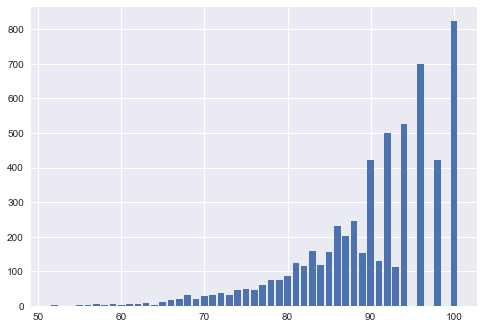

In [102]:
scoreCts = ins2016['score'].value_counts()

plt.bar(scoreCts.index, scoreCts)
plt.show()

#### Question 6b

Describe the qualities of the distribution of the inspections scores. Consider the mode(s), symmetry, tails, gaps, and anamolous values. Are there any unusual features of this distribution? What do your observation imply about the scores?

In [110]:
q6b_answer = r"""

The mode for these scores is 100. This graph is skewed left and has an extremely long left tail and no right tail
(the graph continues to go up until the right edge). This graph has weird gaps all over the place, but especially
at the upper end. It appears that not every score is really attainable. Although logic would say you could score
anywhere in the range, the outcomes seem to suggest that if you aren't getting a hundred, the best score you can get is a 
ninety six. I think the observation is that the perfect score doesn't imply perfect in the way we think and that scoring much 
below an 85 isn't equal to the way one may view getting below an 85 in school. The vast majority are getting A's or
high B's.

"""

display(Markdown(q6b_answer))



The mode for these scores is 100. This graph is skewed left and has an extremely long left tail and no right tail
(the graph continues to go up until the right edge). This graph has weird gaps all over the place, but especially
at the upper end. It appears that not every score is really attainable. Although logic would say you could score
anywhere in the range, the outcomes seem to suggest that if you aren't getting a hundred, the best score you can get is a 
ninety six. I think the observation is that the perfect score doesn't imply perfect in the way we think and that scoring much 
below an 85 isn't equal to the way one may view getting below an 85 in school. The vast majority are getting A's or
high B's.



#### Question 6c

In assessing the granularity, we want to determine if there is one inspection per business per year. How many restaurants had two inspections? Three or more inspections? Create a dict mapping the number of inspections to the number of business ids with that many inspections.

*Hint: pandas Series have a to_dict() method.*

In [111]:
ins.to_dict?

In [122]:
ins2016['business_id'].value_counts().value_counts()

1    3329
2    1131
3      83
Name: business_id, dtype: int64

In [125]:
temp = ins2016['business_id'].value_counts().value_counts()
numIns2numIDs = dict(zip(temp.index, temp))
numIns2numIDs

{1: 3329, 2: 1131, 3: 83}

In [126]:
_ = ok.grade('q06c')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: mattholtzer9@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/DkVmxq
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



### Restaurants with multiple inspections

### Question 7

Some restaurants had 3 inspections in a calandar year, but not very many did. To examine the distribution of score among restaurants with two scores, we can look at the change in score from the first inspection.

#### Question 7a

What's the relationship between the first and second scores for the businesses with 2 inspections in a year? Do they typically improve?

First, make a dataframe called, `scores_pairs_by_business`, indexed by business_id (containing only business with exactly 2 inspections in 2016).  This dataframe contains the field `score_pair` consisting of the score pairs ordered chronologically  `[first_score, second_score]`. 

Plot these scores. That is, make a scatter plot to display these pairs of scores. Include on the plot a reference line with slope 1. 

You may find the functions `sort_values`, `groupby`, `filter` and `agg` helpful, though not all necessary. 

The first few rows resulting table should look something like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>score_pair</th>
    </tr>
    <tr>
      <th>business_id</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>24</th>
      <td>[96, 98]</td>
    </tr>
    <tr>
      <th>45</th>
      <td>[78, 84]</td>
    </tr>
    <tr>
      <th>66</th>
      <td>[98, 100]</td>
    </tr>
    <tr>
      <th>67</th>
      <td>[87, 94]</td>
    </tr>
    <tr>
      <th>76</th>
      <td>[100, 98]</td>
    </tr>
  </tbody>
</table>

In [ ]:
ins2016['b']

In [242]:
where2 = ins2016[ins2016['business_id'].isin(ins2016['business_id'].value_counts()[ins2016['business_id'].value_counts()==2].index)]

In [256]:
where2 = where2.iloc[::-1]

In [276]:
ids = where2.iloc[::-1]['business_id'].unique()

In [299]:
score_pairs_by_business =  where2.groupby('business_id', as_index = False)['score'].apply(list)
scores_pairs_by_business = pd.DataFrame(
    data = {
        'score_pair': score_pairs_by_business
    },
    index = ids.astype(int)
)
scores_pairs_by_business.head()

,score_pair
24,"[96, 96]"
45,"[89, 88]"
66,"[96, 100]"
67,"[100, 98]"
76,"[82, 87]"


In [300]:
# Create scatter plot here.


In [301]:
_ = ok.grade('q07a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Question 7a > Suite 1 > Case 1

>>> all(len(v[0])==2 for v in scores_pairs_by_business.values)
TypeError: object of type 'float' has no len()

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     TypeError: object of type 'float' has no len()

Run only this test case with "python3 ok -q q07a --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Submit... 100% complete
Submission successful for user: mattholtzer9@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/submissions/o2gEoz
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 7b

Another way to compare the scores from the two inspections is to examine the difference in scores. Subtract the first score from the second in `scores_pairs_by_business`. Make a histogram of these differences in the scores. We might expect these differences to be positive, indicating an improvement from the first to the second inspection.

In [ ]:
# Create histogram here.

#### Question 7c

If a restaurant's score improves from the first to the second inspection, what do you expect to see in the scatter plot that you made in 7a? What do you see?

If a restaurant's score improves from the first to the second inspection, how would this be reflected in the histogram of the difference in the scores that you made in 7b? What do you see?

In [ ]:
q7c_answer = r"""

Put your answer here, replacing this text.

"""

display(Markdown(7c_answer))

## Summary of the inspections data

What we have learned about the inspections data? What might be some next steps in our investigation? 

* We found that the records are at the inspection level and that we have inspections for multiple years.   
* We also found that may restaurants have more than one inspection a year. In the future, we may want to roll some of the information about the inspections up to the business/restaurant level and join the inspection information with the business dataframe. For example, we could make maps of inspection scores for restaurants.
* We also examined the relationship between the scores when a restaurant has multiple inspections in a year. Our findings were a bit counterintuitive and we warrant further investigation. It also makes sense to learn more about the inspection process to help us understand the connections between scores from multiple inspections. 


# Violations Data

Lastly, we will explore the `vio` data set. As with the first two DataFreames, we want to determine the granularity of the data, the number of records and fields, and we want to investigate the fields (variables). 

### Question 8

#### Question 8a

How many records are in `vio`? What does this tell you about the granularity of `vio` in comparison to `bus` and `ins`? 

In [149]:
len(vio)

40936

In [150]:
vio.head()

,business_id,date,description
0,10,20160503,High risk food holding temperature [ date vi...
1,10,20160503,High risk food holding temperature [ date vi...
2,10,20160503,High risk vermin infestation
3,10,20160503,Unapproved or unmaintained equipment or utensils
4,10,20160503,No thermometers or uncalibrated thermometers


In [151]:
q8a_answer = r"""

There are 40,936 records in vio, more than the number of businesses and the number of inspections. 
This tells us that violations are more frequent and is a slightly more in depth look. Many violations occur per 
inspection and there are often many inspections per business.

"""
display(Markdown(q8a_answer))



There are 40,936 records in vio, more than the number of businesses and the number of inspections. 
This tells us that violations are more frequent and is a slightly more in depth look. Many violations occur per 
inspection and there are often many inspections per business.



Let's examine the first few rows of `vio` to see if that provides addtional information about the granularity.

In [152]:
vio.head(10)

,business_id,date,description
0,10,20160503,High risk food holding temperature [ date vi...
1,10,20160503,High risk food holding temperature [ date vi...
2,10,20160503,High risk vermin infestation
3,10,20160503,Unapproved or unmaintained equipment or utensils
4,10,20160503,No thermometers or uncalibrated thermometers
5,10,20140729,Insufficient hot water or running water [ dat...
6,10,20140729,Unapproved or unmaintained equipment or utensi...
7,10,20140114,Improper storage of equipment utensils or line...
8,10,20140114,Unclean or degraded floors walls or ceilings ...
9,10,20140114,Inadequate and inaccessible handwashing facili...


Just looking at the first few records in `vio` we see that each inspection has multiple entries. Reading the descriptions, we see that if corrected, a date is listed in the description within square brackets. This date appears to be the same date as the inspection.
We will consider how to derive features from the `description` field when we cover the topic of regular expressions.

#### Question 8b

As with the inspections data frame, let's examine only records for 2016. 
Recall that the dates in the `ins` file are formatted as strings such as 20160503. As before, convert these dates into a datetime object called `new_date`, and create a new colum called `year` that contains the year only. 

In [153]:
vio['new_date'] = pd.to_datetime(vio['date'], format='%Y%m%d')
vio['year']     = vio['new_date'].dt.year
vio2016 = vio[vio['year']==2016]

In [154]:
_ = ok.grade('q08b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Backup... 100% complete
Backup successful for user: mattholtzer9@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/qxkyG0
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Number of violations

When we explore data, we often create new variables that we think might be useful in our analysis. For example, a variable that contains the number of violation records per inspection may be of interest. We might want to see if the number of inspections is correlated with the inspection score.  Or, we might be interested in whether the score improves on the second inspection. 

#### Question 8c
Derive a variable, `num_vio`, that contains the number of violations in a restaurant inspection.

In [170]:
vio_select = vio2016[['business_id', 'new_date']]

In [228]:
vio_select.groupby('business_id').size()

business_id
10        5
19        3
24        3
31        6
45       12
50        7
56        4
58        6
61        3
66        1
67        6
73        3
76        1
77        4
80        1
95        5
98        1
101       1
102       4
116       6
125       3
132       5
140       4
146      10
151       2
164       3
178      10
180       7
184       1
187       2
         ..
88575     4
88653     3
88657     5
88659     2
88675     1
88676     2
88702     2
88722     4
88756    11
88758     4
88792     1
88799     5
88840     3
88878     2
88899     5
88915     3
88932     6
89070     4
89072     3
89111     3
89191     2
89201     1
89305     3
89328     6
89453     4
89462     5
89475     2
89515     1
89790     1
89900     1
Length: 4006, dtype: int64

In [229]:
ins2016['num_vio'] = pd.merge(vio2016, )['']

TypeError: merge() missing 1 required positional argument: 'right'

In [ ]:
ins2016.head()

In [ ]:
_ = ok.grade('q08c')
_ = ok.backup()

#### Question 8d

Now that we have created this new varable, let's examine its distribution. 
Make a histogram of `num_vio` and describe its shape.

In [ ]:
plt.hist(...)

In [ ]:
q8d_answer = r"""

Put your answer here, replacing this text.

"""

display(Markdown(q8d_answer))

## Summary of the violations data

Let's take stock of what we have learned about the violations data and what might be the next steps in our investigation. 

* We found that the records consist of the violations that were found on an inspection. And from inspection it seems that if a violation is corrected this information is provided in the description field.
* We also found that the distribution of the number of violations shows that some restaurants had many violations. 
* In the future, we might want to investigate the relationship between the inspection score and the number of violations. Additionally, it migth be interesting to pursue possible connections between the type of violation and the score


## Submission

Congrats! You are finished with HW2. For convenience, we've included a cell below that runs all the OkPy tests.

In [226]:
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("ok_tests") if q.startswith('q')]

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t

Now, run the cell below to submit your assignment to OkPy. The autograder should email you shortly with your autograded score. The autograder will only run once every 30 minutes.

**If you're failing tests on the autograder but pass them locally**, you should simulate the autograder by doing the following:

1. In the top menu, click Kernel -> Restart and Run all.
2. Run the cell above to run each OkPy test.

**You must make sure that you pass all the tests when running steps 1 and 2 in order.** If you are still failing autograder tests, you should double check your results.

In [303]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2.ipynb'.
Submit... 100% complete
Submission successful for user: mattholtzer9@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/submissions/DkVBDB
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



Also, as of this writing there's a bug in OkPy where it will say:

```
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit
```

when running the cell above. Don't worry about that; if you can visit OkPy and see your submission, you've submitted the assignment.

Even if you forget to run the cell above, we'll automatically take your latest backup when grading so don't worry about that.